In [30]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import math
from datetime import datetime
import random
import os
import json
import threading
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [9]:
url = "https://usebounce.com/blog?q="
print("Site URL - ", url)
response = requests.get(url)
print("Response - ", response.status_code)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

Site URL -  https://usebounce.com/blog?q=
Response -  200


In [13]:
articles = soup.find('div',{'class':'grid gap-4 mt-5 sm:gap-y-9 sm:gap-x-10 sm:mt-8 grid-cols-1 sm:grid-cols-2 lg:grid-cols-3'}).find_all('article')

print("Number of articles - ", len(articles))

Number of articles -  109


In [47]:
blog_info = []
date_format = "%d %B, %Y"
for article in articles:
    date_posted = article.find('span',{'class':'ml-6 text-gray-500 text-body2 line-clamp-1'}).text
    title = article.find('h3').text
    subtitle = article.find('p').text if article.find('p') else ''
    json = {
        "date_posted": datetime.strptime(date_posted, date_format),
        "title": title,
        "subtitle": subtitle
    }
    blog_info.append(json)

In [48]:
blog_df = pd.DataFrame(blog_info)

blog_df['date_posted_year_month'] = blog_df['date_posted'].dt.to_period('M')

In [49]:
blog_df

,date_posted,title,subtitle,date_posted_year_month
0,2023-05-24,The 2023 solo travel index,The best countries to visit when traveling solo,2023-05
1,2023-05-23,Sunset Skies,The world’s most beautiful sunset destinations,2023-05
2,2023-05-23,Europe’s friendliest city breaks,The friendliest places to visit across Europe,2023-05
3,2023-05-18,Airport wait times 2023,Which US airports have the longest & shortest ...,2023-05
4,2023-05-17,10 Tips For Traveling With A Large Group,Bounce assembled a list of first-rate tips for...,2023-05
...,...,...,...,...
104,2020-02-21,10 Things to do in Reykjavik - Iceland Travel ...,Heading to Reykjavik and need some Iceland tra...,2020-02
105,2019-08-16,The Best Luggage Storage Solution For New York...,,2019-08
106,2019-09-10,How to Choose the Best Luggage for Traveling,Whether you’re a frequent flyer or you just ta...,2019-09
107,2019-09-10,6 Packing Tips for Your Upcoming Business Trip,Traveling for business can be pretty fun. Ther...,2019-09


<Axes: xlabel='date_posted_year_month'>

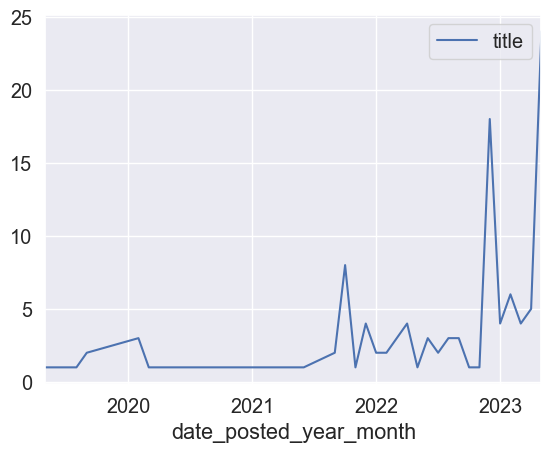

In [56]:
import plotly.express as px
#fig = px.histogram(pd.DataFrame(blog_df.groupby(blog_df.date_posted_year_month)['title'].count()), x="date_posted_year_month")
#fig.show()

blog_df.groupby('date_posted_year_month')['title'].count().plot(legend=True)
